# 1 - Configurações Iniciais

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## 1.1 - Leitura do arquivo 

In [2]:
file_name = "20230115_Pedidos_csv_2022.csv"
path = r"C:\Users\rhcorrea\OneDrive - Stefanini\Desktop\Python\Pandas\Treinamento_2\Base_de_dados"
path_complete = path+"\\"+file_name
columns = ["id_pedido","nr_pedido","competencia","orgao","status","data_solicitacao","pedido_feito",
           "justificativa","data_conclusao","status_respostas","status_solucao","evidencia","meio_de_comunicao","id_mensagem",
           "tipo_de_assunto","assunto_n1","assunto_n2","data_respota","resposta","conclusao_do_pedido","complemento"]

In [3]:
pedidos = pd.read_csv(path_complete,sep = ";" , header = None ,encoding = "UTF-16 LE" )

## 1.2 - Formatação das colunas

In [4]:
pedidos.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20],
           dtype='int64')

In [5]:
for col_old,col_new in zip(pedidos.columns,columns):
    pedidos.rename(columns={col_old:col_new}, inplace=True)

In [6]:
pedidos.index.name = "quantidade_pedidos"
pedidos.columns.name = "detalhes_do_pedido"

## 1.3 - Vericando tipos dos dados do DataFrame

In [7]:
pedidos.dtypes

detalhes_do_pedido
id_pedido               int64
nr_pedido               int64
competencia            object
orgao                  object
status                 object
data_solicitacao       object
pedido_feito           object
justificativa          object
data_conclusao         object
status_respostas       object
status_solucao         object
evidencia              object
meio_de_comunicao      object
id_mensagem             int64
tipo_de_assunto        object
assunto_n1             object
assunto_n2             object
data_respota           object
resposta               object
conclusao_do_pedido    object
complemento            object
dtype: object

## 1.4 - Convertendo o tipo dados

In [8]:
pedidos = pedidos.convert_dtypes(infer_objects=True)

In [9]:
pedidos["data_solicitacao"] = pedidos["data_solicitacao"].str.replace("/","-")
pedidos["data_conclusao"] = pedidos["data_conclusao"].str.replace("/","-")
pedidos["data_respota"] = pedidos["data_respota"].str.replace("/","-")

In [10]:
pedidos[["data_solicitacao","data_conclusao","data_respota"]] = pedidos[["data_solicitacao","data_conclusao","data_respota"]].apply(pd.to_datetime,format='%d-%m-%Y')

In [11]:
pedidos.info()
#pedidos.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68698 entries, 0 to 68697
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id_pedido            68698 non-null  Int64         
 1   nr_pedido            68698 non-null  Int64         
 2   competencia          68698 non-null  string        
 3   orgao                68698 non-null  string        
 4   status               68698 non-null  string        
 5   data_solicitacao     68698 non-null  datetime64[ns]
 6   pedido_feito         64835 non-null  string        
 7   justificativa        68698 non-null  string        
 8   data_conclusao       68698 non-null  datetime64[ns]
 9   status_respostas     68698 non-null  string        
 10  status_solucao       68698 non-null  string        
 11  evidencia            68698 non-null  string        
 12  meio_de_comunicao    68698 non-null  string        
 13  id_mensagem          68698 non-

# 2 - Analise exploratória 

In [12]:
pedidos["status"].describe()

count         68698
unique            1
top       Concluída
freq          68698
Name: status, dtype: object

In [13]:
pedidos["assunto_n1"].describe()

count     68698
unique      900
top            
freq      61571
Name: assunto_n1, dtype: object

In [14]:
print(pedidos.isna().sum())

detalhes_do_pedido
id_pedido                 0
nr_pedido                 0
competencia               0
orgao                     0
status                    0
data_solicitacao          0
pedido_feito           3863
justificativa             0
data_conclusao            0
status_respostas          0
status_solucao            0
evidencia                 0
meio_de_comunicao         0
id_mensagem               0
tipo_de_assunto           0
assunto_n1                0
assunto_n2                0
data_respota              0
resposta                  0
conclusao_do_pedido       0
complemento               0
dtype: int64


## 2.1 - Corrigindo os valores nulos

In [15]:
pedidos.fillna(method = 'ffill', inplace = True)

# 3 - Indicadores

In [90]:
total_de_pedidos = pedidos["id_pedido"].count()
competencias = pedidos["competencia"].unique()
data_minima = pedidos["data_solicitacao"].min()
data_maxima = pedidos["data_solicitacao"].max()
meios_de_comunicacao = pedidos["meio_de_comunicao"].groupby(pedidos["meio_de_comunicao"]).count().sort_values(ascending = False)
tipos_de_assuntos = pedidos["tipo_de_assunto"].groupby(pedidos["tipo_de_assunto"]).count().sort_values(ascending = False)
quantidade_dias = abs((data_minima - data_maxima).days)
media_de_pedidos_data = total_de_pedidos/quantidade_dias
df_qtd_pedido = pedidos[["data_solicitacao","id_pedido"]]
quantidade_pedidos_mes = df_qtd_pedido[["id_pedido"]].groupby(df_qtd_pedido["data_solicitacao"].dt.month).count().sort_values(by="data_solicitacao",ascending = False)
quantidade_pedidos_dia = df_qtd_pedido[(df_qtd_pedido["data_solicitacao"].dt.quarter == 1) & (df_qtd_pedido["id_pedido"] > 0)].groupby("data_solicitacao").count().sort_values(by="id_pedido",ascending = False)
quantidade_pedidos_dia = quantidade_pedidos_dia.rename(columns={'id_pedido':'Pedidos'})
conclusao_do_pedido = pedidos[["conclusao_do_pedido","id_pedido"]].groupby("conclusao_do_pedido").count().sort_values(by = "id_pedido",ascending = False)

In [17]:
total_de_pedidos

68698

In [18]:
competencias

<StringArray>
['Federal']
Length: 1, dtype: string

In [19]:
meios_de_comunicacao

meio_de_comunicao
Internet         68260
E-mail             231
WhatsApp            65
Outros              52
Presencial          49
Telefone            36
Carta                4
Redes Sociais        1
Name: meio_de_comunicao, dtype: int64

In [20]:
tipos_de_assuntos

tipo_de_assunto
Acesso à informação                         32153
Concurso                                     1672
Atendimento                                  1590
Outros em Administração                      1473
Legislação                                   1466
                                            ...  
Fomento ao Trabalho                             4
Lazer                                           3
Agradecimento aos profissionais da Saúde        2
Esporte Comunitário                             1
                                                1
Name: tipo_de_assunto, Length: 184, dtype: int64

# 4 - Plotando os graficos

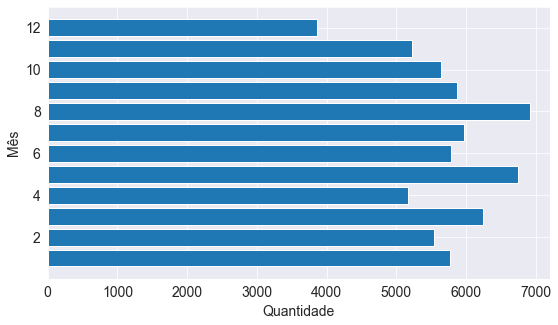

In [63]:
quantidade_pedidos_mes.index.name="index"
quantidade_pedidos_mes.columns.name=None
quantidade_pedidos_mes["mes"] = quantidade_pedidos_mes.index
x = quantidade_pedidos_mes["mes"]
y = quantidade_pedidos_mes["id_pedido"]
plt.barh(x,y)
plt.ylabel('Mês')
plt.xlabel('Quantidade')
plt.axis(xmin=0,xmax = 7200) #ou xticks()
plt.show()

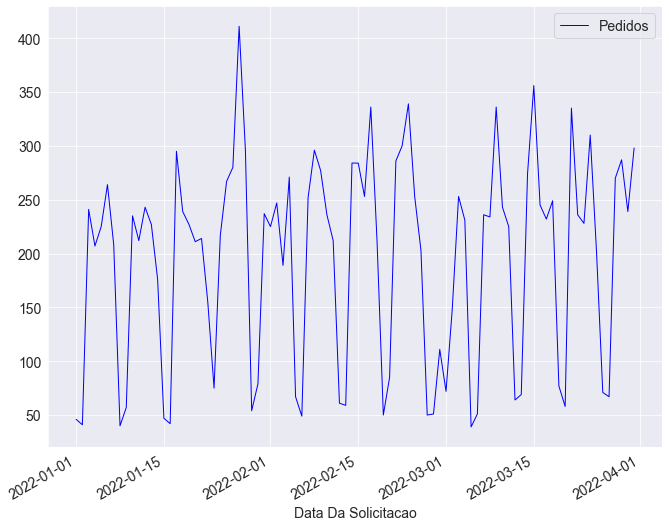

In [61]:
axes = quantidade_pedidos_dia.plot(figsize=(11,9), subplots=False,linewidth=1, color='b')
plt.legend()
plt.xlabel('Data Da Solicitacao')
plt.show()

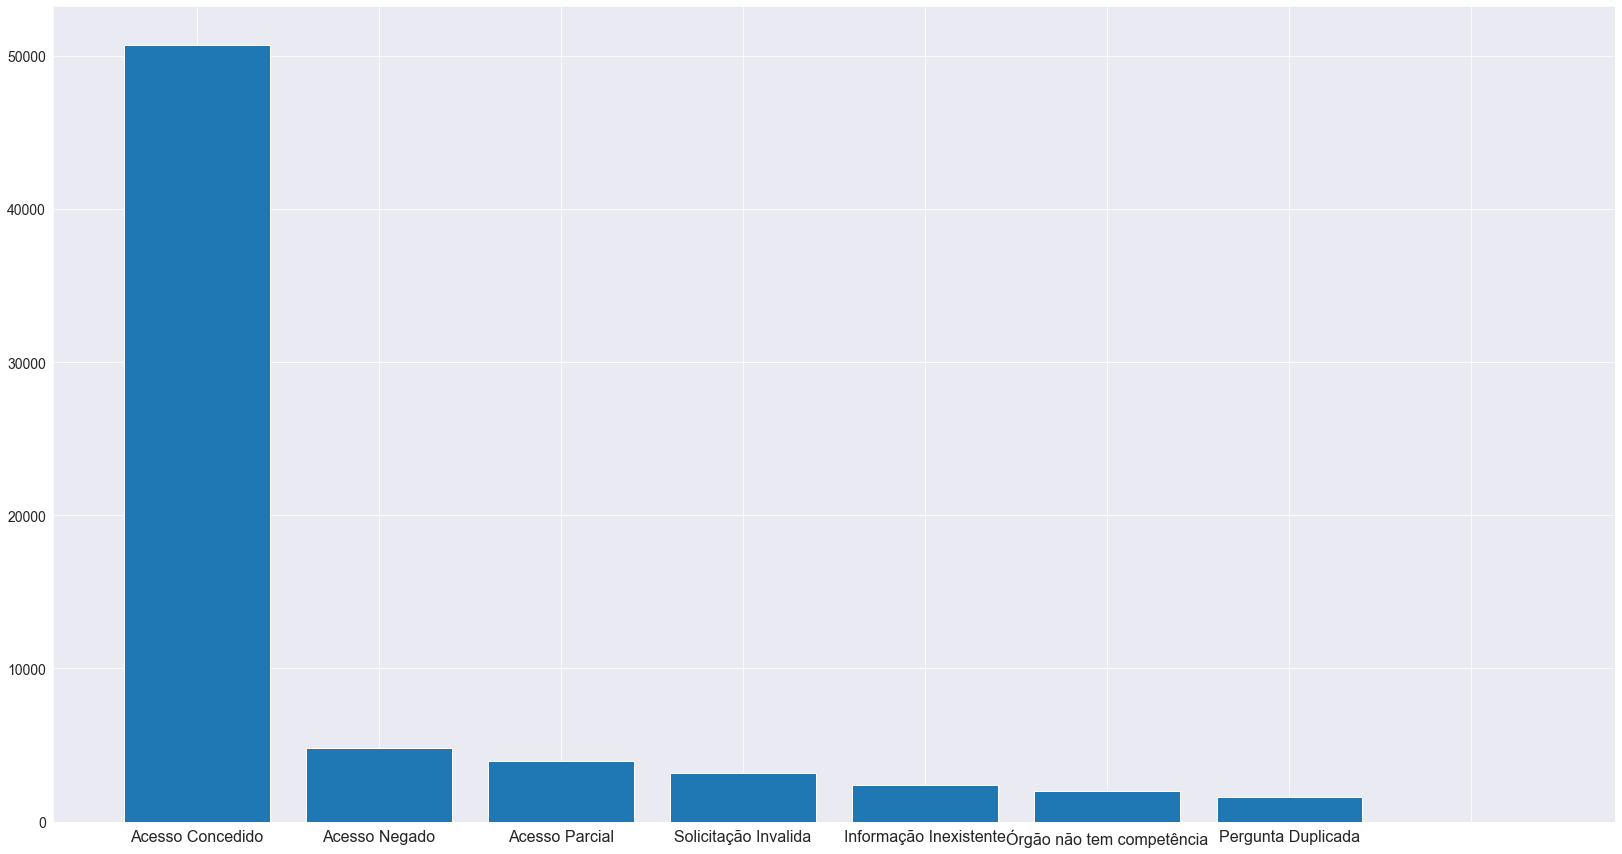

In [120]:
conclusao_do_pedido = conclusao_do_pedido.rename(columns={'id_pedido':'Pedidos'})
conclusao_do_pedido.index.name = None
conclusao_do_pedido.columns.name = None
#conclusao_do_pedido = conclusao_do_pedido.reindex(range(0,8))
eixoX = conclusao_do_pedido["Pedidos"]
eixoY = ['Acesso Concedido', 'Acesso Negado', 'Acesso Parcial',
       'Solicitação Invalida', 'Informação Inexistente',
       'Órgão não tem competência','Pergunta Duplicada','']
plt.figure( figsize=(28, 15))
plt.bar(eixoY,eixoX)
plt.show()

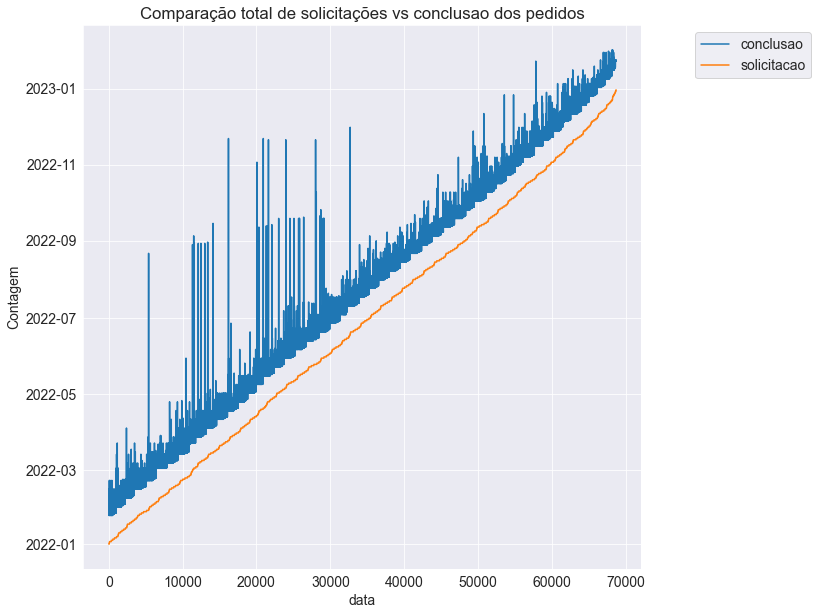

In [24]:
plt.figure(figsize=(10,10))
plt.plot(pedidos[["data_conclusao","data_solicitacao"]])
plt.title("Comparação total de solicitações vs conclusao dos pedidos")
plt.xlabel("data")
plt.ylabel("Contagem")
plt.legend(["conclusao","solicitacao"], loc="upper center",bbox_to_anchor=(1.2,1))